Lets LOOK into vision.

Some of the examples are from [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). 

## Introduction to convnets

**Instantiating a small convnet**

ConvNet takes as input tensors of shape (image_height, image_width, image_channels)

In [39]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

**Displaying the model's summary**

In [40]:
model.summary()

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

See that the output of every Conv2D and MaxPooling2D layer is a rank-3 tensor of shape (28,28,1) - this is our weight, height and channels.

**Training the convnet on MNIST images**

In [41]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9498 - loss: 0.1677
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9858 - loss: 0.0469
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9899 - loss: 0.0333
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9922 - loss: 0.0251
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.9934 - loss: 0.0206


**Evaluating the convnet**

In [42]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9910 - loss: 0.0289
Test accuracy: 0.991


## Training a convnet from scratch on a small dataset

### Downloading the data

Here it is: https://www.kaggle.com/datasets/a9be70d5dadd7f7e222819b0b0b0765048ca2b88465fef1d749f71a89c2915f5  

**Copying images to training, validation, and test directories**

Please install kagglehub and ipywidgets with pip. This will allow you to download the data. 

What to do:

1. Go to https://www.kaggle.com/ and sign in (or create account if you do not have one).
2. Go to https://www.kaggle.com/c/dogs-vs-cats/data, scroll down and click to Join the Competition. This will allow you to download the dataset. 
3. Go to https://www.kaggle.com/settings and generate a Kaggle API key. Save the API Key on the side - it will not reappear. It is best to save it in an environment variable, or somewhere on the side.

In [43]:
import kagglehub

kagglehub.login()
download_path = kagglehub.competition_download("dogs-vs-cats")

In [44]:
import zipfile

with zipfile.ZipFile(download_path + "/train.zip", "r") as zip_ref:
    zip_ref.extractall(".")

In [45]:
import os, shutil, pathlib

# Path to the directory where the original dataset was uncompressed
original_dir = pathlib.Path("train")
# Directory where we will store our smaller dataset
new_base_dir = pathlib.Path("dogs_vs_cats_small")

# Utility function to copy cat (respectively, dog) images from index
# `start_index` to index `end_index` to the subdirectory
# `new_base_dir/{subset_name}/cat` (respectively, dog). "subset_name"
# will be either "train," "validation," or "test."
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

# Creates the training subset with the first 1,000 images of each category
make_subset("train", start_index=0, end_index=1000)
# Creates the validation subset with the next 500 images of each category
make_subset("validation", start_index=1000, end_index=1500)
# Creates the test subset with the next 1,000 images of each category
make_subset("test", start_index=1500, end_index=2500)

### Building the model

**Instantiating a small convnet for dogs vs. cats classification**

In [46]:
import keras
from keras import layers

# The model expects RGB images of size 180 x 180.
inputs = keras.Input(shape=(180, 180, 3))
# Rescales inputs to the [0, 1] range by dividing them by 255
x = layers.Rescaling(1.0 / 255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=512, kernel_size=3, activation="relu")(x)
# Flattens the 3D activations with shape (height, width, 512) into 1D
# activations with shape (512,) by averaging them over spatial
# dimensions
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [47]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 7, 7, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,569,089 (5.99 MB)

 Trainable params: 1,569,089 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

Important: The depth of the feature maps progressively increases (from 32 to 256) and the size of the feature maps decreases (from 180 × 180 to 7 × 7).

**Configuring the model for training**

In [48]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

### Data preprocessing

What we need to do:
1. Open the pictures
2. Decode the JPEG content to RGB channels with pixels (3 channels with given color pixel intensity)
3. Convert the decoded information into floating-point tensors.
4. Resize all pictures to a shared size (we’ll use 180 × 180).
5. Create batches (here of 32 examples)

**Using `image_dataset_from_directory` to read images**

If the outlined tasks seem daunting - the image_dataset_from_directory does the most of the job for us.

In [49]:
from keras.utils import image_dataset_from_directory

batch_size = 64
image_size = (180, 180)
train_dataset = image_dataset_from_directory(
    new_base_dir / "train", image_size=image_size, batch_size=batch_size
)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation", image_size=image_size, batch_size=batch_size
)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test", image_size=image_size, batch_size=batch_size
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


Dataset API:

In [50]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [51]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)


It is basically an iterator.

In [52]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [53]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)


**Displaying the shapes of the data and labels yielded by the `Dataset`**

In [54]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (64, 180, 180, 3)
labels batch shape: (64,)


**Fitting the model using a `Dataset`**

ModelCheckpoint callback: we are saving our model after each epoch

In [55]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss",
    )
]
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset,
    callbacks=callbacks,
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4960 - loss: 0.6946 - val_accuracy: 0.5810 - val_loss: 0.6919
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5465 - loss: 0.6906 - val_accuracy: 0.6220 - val_loss: 0.6768
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5785 - loss: 0.6844 - val_accuracy: 0.6250 - val_loss: 0.6582
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.6145 - loss: 0.6570 - val_accuracy: 0.6510 - val_loss: 0.6246
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6625 - loss: 0.6228 - val_accuracy: 0.6690 - val_loss: 0.6173
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.6765 - loss: 0.6021 - val_accuracy: 0.6330 - val_loss: 0.6548
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.6765 - loss: 0.6126 - val_accuracy: 0.6650 - val_loss: 0.6117
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6885 - loss: 0.5942 - val_accuracy: 0.6820 - val_loss:

**Displaying curves of loss and accuracy during training**

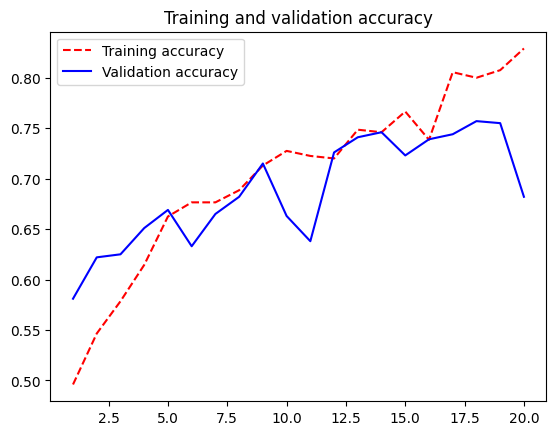

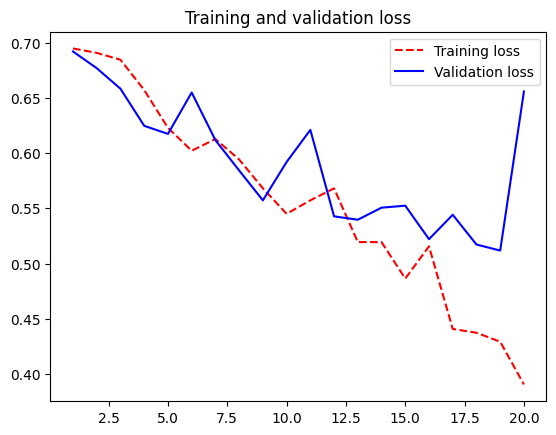

In [56]:
import matplotlib.pyplot as plt

accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "r--", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "r--", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

What does it look like? What happened to our model? Why?

**Evaluating the model on the test set**

In [57]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 238ms/step - accuracy: 0.7665 - loss: 0.4983
Test accuracy: 0.766


### Using data augmentation

Too few datapoints! What we will do? Augment our dataset.

**Define a data augmentation stage to add to an image model**

In [58]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

**Displaying some randomly augmented training images**

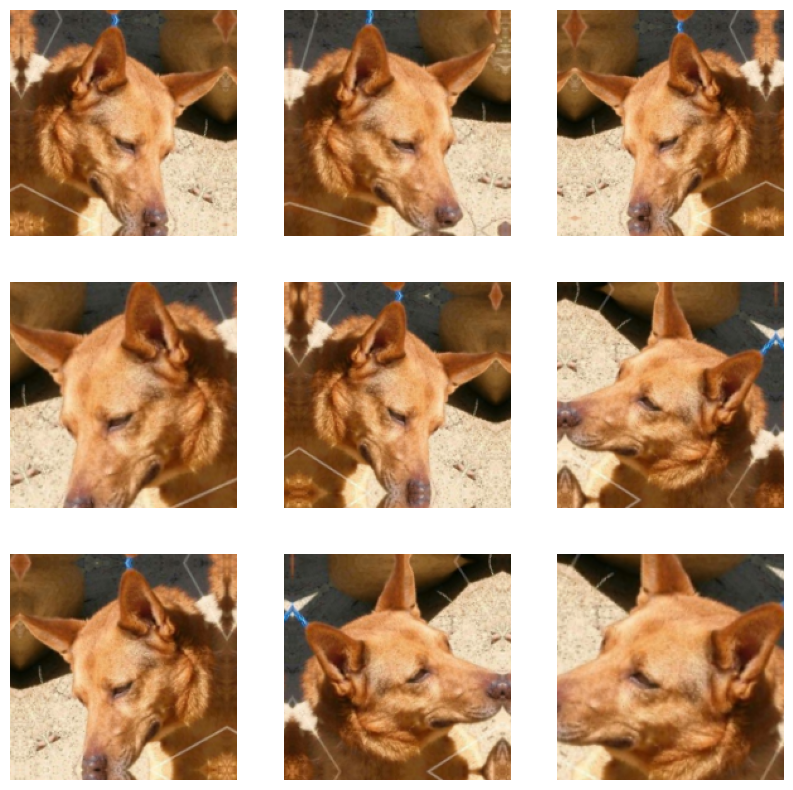

In [59]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

**Defining a new convnet that includes image augmentation and dropout**

In [67]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

**Training the regularized convnet**

In [68]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 808ms/step - accuracy: 0.4970 - loss: 0.6967 - val_accuracy: 0.5600 - val_loss: 0.6925
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 827ms/step - accuracy: 0.5220 - loss: 0.6933 - val_accuracy: 0.4990 - val_loss: 0.6949
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 854ms/step - accuracy: 0.5660 - loss: 0.6778 - val_accuracy: 0.5110 - val_loss: 0.9870
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 29s 894ms/step - accuracy: 0.5230 - loss: 0.6985 - val_accuracy: 0.5070 - val_loss: 0.6995
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 27s 830ms/step - accuracy: 0.5130 - loss: 0.6956 - val_accuracy: 0.5370 - val_loss: 0.6897
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 871ms/step - accuracy: 0.5750 - loss: 0.6856 - val_accuracy: 0.6170 - val_loss: 0.6694
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 864ms/step - accuracy: 0.5885 - loss: 0.6692 - val_accuracy: 0.5340 - val_loss: 0.6883
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 28s 876ms/step - accuracy: 0.5885 - loss: 0.6676 - val_accu

**Evaluating the model on the test set**

In [69]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 196ms/step - accuracy: 0.7975 - loss: 0.4642
Test accuracy: 0.798


## Leveraging a pretrained model

### Feature extraction with a pretrained model

**Instantiating the VGG16 convolutional base**

In [63]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [64]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 180, 180, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 180, 180, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 90, 90, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 90, 90, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 90, 90, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 45, 45, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 45, 45, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 45, 45, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 22, 22, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 22, 22, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 11, 11, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 11, 11, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 5, 5, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Article on the VGG16 from 2014: https://arxiv.org/abs/1409.1556.  
As you see it is from far back, but has a simmilar architecture to what we used before.  
Where we find all the models: https://keras.io/api/applications/

![VGG16](../img/vgg16.png)

#### Fast feature extraction without data augmentation

**Extracting the VGG16 features and corresponding labels**

In [70]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 

In [71]:
train_features.shape

(2000, 5, 5, 512)

**Defining and training the densely connected classifier**

In [72]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9345 - loss: 12.0495 - val_accuracy: 0.9720 - val_loss: 4.6301
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9815 - loss: 2.4092 - val_accuracy: 0.9770 - val_loss: 3.0670
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9925 - loss: 0.6684 - val_accuracy: 0.9770 - val_loss: 3.8246
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9920 - loss: 0.5397 - val_accuracy: 0.9790 - val_loss: 4.2147
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.9900 - loss: 1.2046 - val_accuracy: 0.9800 - val_loss: 4.5472
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.9995 - loss: 0.1186 - val_accuracy: 0.9830 - val_loss: 3.3750
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.9960 - loss: 0.2939 - val_accuracy: 0.9740 - val_loss: 5.1787
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9960 - loss: 0.4304 - val_accuracy: 0.9820 - 

**Plotting the results**

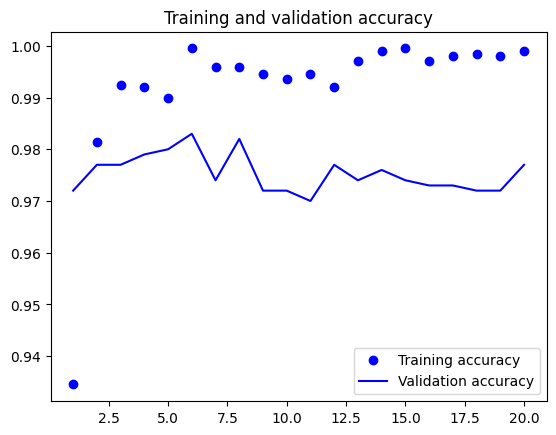

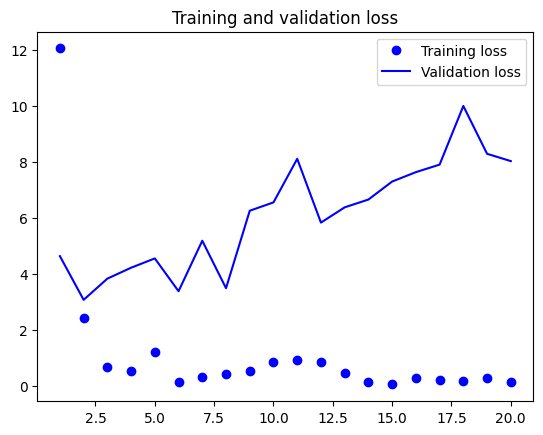

In [73]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Feature extraction together with data augmentation

**Instantiating and freezing the VGG16 convolutional base**

In [74]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

**Printing the list of trainable weights before and after freezing**

In [75]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


In [76]:
conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights after freezing the conv base: 0


**Adding a data augmentation stage and a classifier to the convolutional base**

In [77]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [78]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 238s 8s/step - accuracy: 0.8740 - loss: 17.1592 - val_accuracy: 0.9790 - val_loss: 3.7347
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 205s 6s/step - accuracy: 0.9630 - loss: 3.6455 - val_accuracy: 0.9680 - val_loss: 5.0851
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 183s 6s/step - accuracy: 0.9655 - loss: 3.2380 - val_accuracy: 0.9800 - val_loss: 2.1104
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 187s 6s/step - accuracy: 0.9695 - loss: 2.7090 - val_accuracy: 0.9750 - val_loss: 3.0977
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 410s 13s/step - accuracy: 0.9715 - loss: 2.4180 - val_accuracy: 0.9840 - val_loss: 1.7274
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 180s 6s/step - accuracy: 0.9790 - loss: 1.5055 - val_accuracy: 0.9660 - val_loss: 5.0417
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 200s 6s/step - accuracy: 0.9785 - loss: 2.1831 - val_accuracy: 0.9750 - val_loss: 2.1302
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 184s 6s/step - accuracy: 0.9805 - loss: 1.5083 - val_accuracy: 0.9730 -

**Evaluating the model on the test set**

In [79]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 120s 4s/step - accuracy: 0.9740 - loss: 2.9635
Test accuracy: 0.974


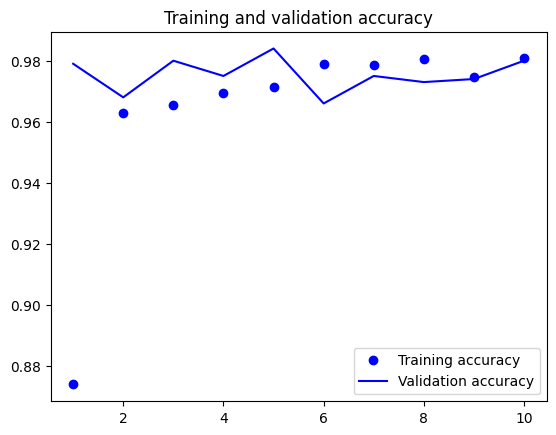

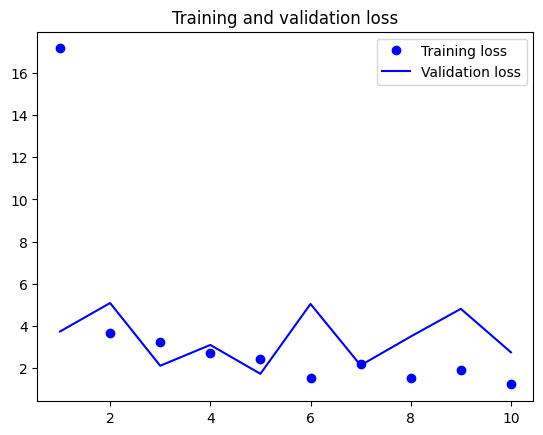

In [80]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### Fine-tuning a pretrained model

Another important technique for reusing models — complementary to feature extraction — is fine-tuning.

Fine-tuning means unfreezing a pretrained model base and training it together with the new layers you added on top. In practice, this usually means unfreezing part (or all) of a pretrained convolutional base and jointly training it with your custom classifier.

It is called *fine*-tuning because we do not retrain the model from scratch. Instead, we slightly adjust its higher-level representations so they become more relevant to the new task.

Importantly - we cannot fine-tune from scratch even if we already have a solid base.
When we first attach a new classifier on top of a pretrained base, that classifier is randomly initialized.

If we immediately allow gradients to update the pretrained layers, the error signal will be large and unstable. This can destroy the useful representations learned during pretraining.

For this reason, fine-tuning must be done in stages.

**Proper Fine-Tuning Procedure**

1. Add your custom layers on top of a pretrained base network.
2. Freeze the pretrained base.
3. Train only the newly added layers.
4. Unfreeze the base network (fully or partially).
5. Jointly train both the base and the new layers with a low learning rate.

The low learning rate is important — we want small adjustments, not large updates.

When fine-tuning, BatchNormalization layers should typically remain frozen.

Batch normalization behaves differently from other layers and can destabilize training if unfrozen prematurely.

In [ ]:
conv_base.summary()

**Freezing all layers until the fourth from the last**

In [ ]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

**Fine-tuning the model**

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")